In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='SimHei.ttf')
zhfont.set_family('SimHei')
zhfont.set_size(11)
zhfont.get_family()

data = pd.read_csv('Speed Dating Data.csv', encoding='gbk')
columns=['dec','gender','attr','sinc','intel','fun','amb','shar']
female = data.loc[data['gender']==0, columns]
male = data.loc[data['gender']==1, columns]

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import roc_curve, auc

# 女性

In [12]:
forest_female = RandomForestClassifier(n_estimators=1000, random_state=1234, 
                                       n_jobs=-1)

# Discard missing data
female_discard_missing = female.loc[np.all(female.notnull(), axis=1), :]  
X_female = female_discard_missing[columns[2:]]
y_female = female_discard_missing['dec']
train_X_female, test_X_female, train_y_female, test_y_female = train_test_split(X_female, 
                                                                                y_female,
                                                                                train_size=0.75,
                                                                                random_state=1234,
                                                                                shuffle=True)

In [16]:
forest_female.fit(train_X_female, train_y_female)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [59]:
#女性特征重要性排序
female_importance = forest_female.feature_importances_
column_index = np.argsort(female_importance)  
female_importance = sorted(female_importance)  


No handles with labels found to put in legend.


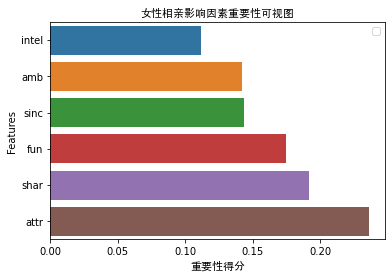

In [61]:

import seaborn as sns

# Creating a bar plot
sns.barplot(x=female_importance, y=female.columns[2:][column_index])

plt.xlabel('重要性得分',fontproperties=zhfont)
plt.ylabel('Features')
plt.title("女性相亲影响因素重要性可视图",fontproperties=zhfont)
plt.legend()
plt.show()

对于女性相亲来说，接受拒绝对象的影响因素按重要性排序是吸引力，共同爱好，幽默，sinc，amb,intel.

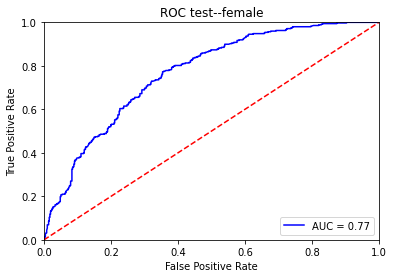

In [47]:
prob_y_female = forest_female.predict_proba(test_X_female)
fpr, tpr, _ = roc_curve(test_y_female, prob_y_female[:, 1])
roc_auc = auc(fpr, tpr)

figure = plt.figure(2)
plt.title('ROC test--female')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
y_pred=forest_female.predict(test_X_female)

#Import accuracy_score for accuracy calculation
from sklearn.metrics import accuracy_score
# Model Accuracy
print("女性相亲随机森林模型的测试误差为:",accuracy_score(test_y_female, y_pred))

女性相亲随机森林模型的测试误差为: 0.6959537572254335


# 男性相亲随机森林模型

In [49]:
forest_male = RandomForestClassifier(n_estimators=1000, random_state=1234, 
                                       n_jobs=-1)

# discard missing data
male_discard_missing = male.loc[np.all(male.notnull(), axis=1), :]  
X_male = male_discard_missing[columns[2:]]
y_male = male_discard_missing['dec']
train_X_male, test_X_male, train_y_male, test_y_male = train_test_split(X_male, 
                                                                                y_male,
                                                                                train_size=0.75,
                                                                                random_state=1234,
                                                                                shuffle=True)

In [50]:
forest_male.fit(train_X_male, train_y_male)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [53]:
#男性特征重要性排序
male_importance = forest_male.feature_importances_
column_index = np.argsort(male_importance) 
male_importance = sorted(male_importance) 


No handles with labels found to put in legend.


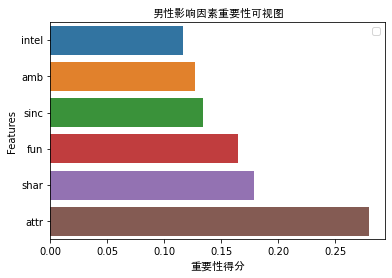

In [62]:



# Creating a bar plot
sns.barplot(x=male_importance, y=male.columns[2:][column_index])

plt.xlabel('重要性得分',fontproperties=zhfont)
plt.ylabel('Features')
plt.title("男性影响因素重要性可视图",fontproperties=zhfont)
plt.legend()
plt.show()

对于男性相亲来说，接受拒绝对象的影响因素按重要性由大到小排序是吸引力，共同爱好，幽默，amb,sinc，intel.

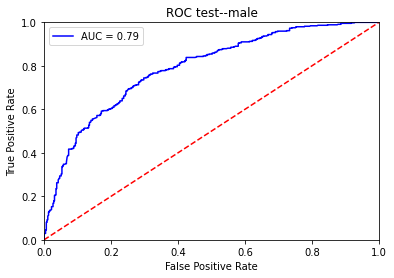

In [56]:
prob_y_male = forest_male.predict_proba(test_X_male)
fpr, tpr, _ = roc_curve(test_y_male, prob_y_male[:, 1])
roc_auc = auc(fpr, tpr)

figure = plt.figure(2)
plt.title('ROC test--male')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
y_pred=forest_male.predict(test_X_male)


# Model Accuracy
print("男性相亲随机森林模型的测试误差为:",accuracy_score(test_y_male, y_pred))

男性相亲随机森林模型的测试误差为: 0.71875
